[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

手写数字为： 0


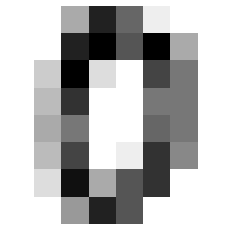

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

# 导入数据集合
digits = datasets.load_digits()
digital = digits.images[0]
label = digits.target[0]

#显示数字的矩阵形式
print(digital)
#显示数字的图片形式
print("\n手写数字为：", label)
plt.axis('off')
plt.imshow(digital, cmap = plt.get_cmap('gray_r'))
plt.show() 

In [2]:
# 机器学习算法分类
# 1. 监督学习：所有的监督学习基本都是分类的代名词
# 2. 非监督学习：本质上是聚类的近义词,比如K均值据类(K-Means Clustering),c层次聚类,主成分分析(PCA)等
# 3. 半监督学习：以标签化的分类信息,通过据类思想将未知事物归类为已知事物,如半监督支持向量机,半监督聚类等

In [3]:
# 性能评估
# 1.过拟合和欠拟合
# 2.二分类的混淆矩阵：TP FP TN FN 查全率(R) = TP / TP + FN    查准率(P) = TP / TP + FP
# 3.F1分数：F1 = 2 * (P * R) / (P + R) 
# 4.P-R曲线：平衡点(BEP)
# 5.ROC曲线: FPR = FP / N    TPR = TP / P
# 6.AUC:沿ROC曲线的横轴做积分,通常取值0.5-1,AUC越大表明分类器性能越好

In [4]:
# sklearn
# 1.流程
# 1.1数据处理,如归一化,标准化,正则化,属性缩放,特征编码,插补缺失值,生成多项式特征
# 1.2分割数据,训练集 验证集(可选),测试集
# 1.3训练模型,选取特征构建模型
# 1.4验证模型
# 1.5测试模型
# 1.6使用模型
# 1.7模型调优

# 2. 功能分类：
# 2.1分类(定性输出)：SVM,Logistic回归,随机森林,决策树,多层感知器(MLP)等 
# 2.2回归(定量输出)：线性回归,SVR,Lasso回归,贝叶斯回归等
# 2.3聚类：k均值聚类,谱聚类,均值飘移等 
# 2.4数据降维：PCA,特征选择,非矩阵分解等
# 2.5模型选择：模型度量(metrics),网格搜索(grid search),交叉验证(cross validation) 
# 2.6数据预处理：数据预处理(preprocessing),特征抽取(feature extraction)

In [5]:
# 1. 线性回归
# 1.1 数据集信息查看
import sklearn
from sklearn.datasets import load_boston
sklearn.__version__
boston = load_boston()
boston.keys()
boston.data
boston.data[0, 2]
boston.data.shape
# boston.data.shape[0]
# boston.data.shape[1]
boston.target
boston.feature_names
print(boston.DESCR)  # 特征信息描述
boston.filename

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

'boston_house_prices.csv'

In [6]:
# 1.2 使用pandas处理数据
import pandas as pd
from sklearn.model_selection import train_test_split
bos = pd.DataFrame(boston.data)
bos.head()
bos.columns = boston.feature_names  # 添加特征名称,sklearn默认是吧特征和标签分开存储的
bos.head()
bos['PRICE'] = boston.target
bos.head()
x = bos.drop('PRICE', axis=1)  # 把PRICE列删除,将剩余特征赋值给x
y = bos['PRICE']  # 把PRICE列赋给y
# x = boston.data  # sklearn自带数据集可以采用简写形式
# y = boston.target
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [7]:
# 1.3 构建回归模型
import numpy as np
from sklearn.linear_model import LinearRegression  # 导入模型
LR = LinearRegression()  # 生成模型
LR.fit(X_train, y_train)  # 训练模型
y_pred = LR.predict(X_test)  # 模型预测
print("w0 = ", LR.intercept_)  # 输出截距
print("W = ", LR.coef_)
np.set_printoptions(precision=3, suppress=True)
print('w0 = {0:.3f}'.format(LR.intercept_))  # 使用numpy改变输出格式
print('W = {}'.format(LR.coef_))

w0 =  37.937107741833316
W =  [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
w0 = 37.937
W = [ -0.121   0.044   0.011   2.511 -16.231   3.859  -0.01   -1.5     0.242
  -0.011  -1.018   0.007  -0.487]


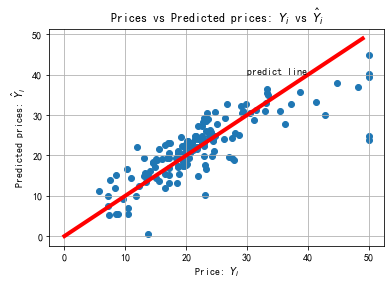

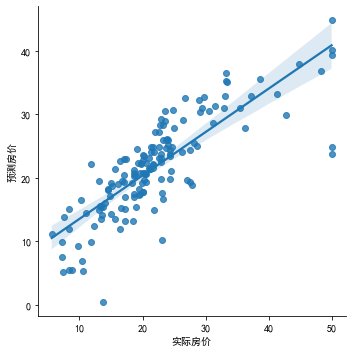

In [8]:
# 1.4 绘制预测结果
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(y_test, y_pred)
plt.xlabel("Price: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")  # 添加laTeX公式标签
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.grid()
x = np.arange(0, 50)
y = x
plt.plot(x, y, color='red', lw=4)
plt.text(30, 40, "predict line")
plt.savefig("price.eps")

# 构造DataFrame数据集
data = pd.concat([pd.Series(y_test.values), pd.Series(y_pred)], axis=1)
data.columns = ['实际房价', '预测房价']
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.lmplot(x='实际房价', y='预测房价', data=data)
plt.show()

In [9]:
# 1.5 预测效果评价
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)
df = pd.DataFrame({'实际房价': y_test, '预测房价': y_pred})
df

27.19596576688338


,实际房价,预测房价
329,22.6,24.935708
371,50.0,23.751632
219,23.0,29.326383
403,8.3,11.975346
78,21.2,21.372725
...,...,...
4,36.2,27.811077
428,11.0,14.506816
385,7.2,7.573699
308,22.8,28.334807


In [10]:
# 2. k邻近算法
# 2.1 特征数据归一化
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X_train = np.array([6, 2, 24, -6, 10])
X_min, X_max = X_train.min(), X_train.max()
print(X_min, X_max)
X_nomal = (X_train - X_min) / (X_max - X_min)  # 求归一化矩阵
print(X_nomal)

X_train = np.array([[6, 2, 24, -6, 10]]).reshape(-1, 1)
# X_train = np.array([[6, 2, 24, -6, 10]]).T
X_std = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
min_max_scaler.transform(X_train)
min_max_scaler.transform(X_train).T

-6 24
[0.4   0.267 1.    0.    0.533]


array([[0.4  , 0.267, 1.   , 0.   , 0.533]])

In [11]:
# 2.2 邻近距离的度量
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
# 分割数据
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=123)
# 选择模型
from sklearn.neighbors import KNeighborsClassifier
# 生成模型对象
knn = KNeighborsClassifier(n_neighbors=3)
# 数据拟合(训练模型)
knn.fit(X,y)
# 模型预测
# 单个数据预测
knn.predict([[4, 3, 5, 3]])  #输出array([2])
# 大集合据预测
y_predict_on_train = knn.predict(X_train)
y_predict_on_test = knn.predict(X_test)
# 模型评估
from sklearn.metrics import accuracy_score
print('训练集合的准确率为: {:.2f}%'.format(100 * accuracy_score(y_train, y_predict_on_train)))
print('测试集合的准确率为: {:.2f}%'.format(100 * accuracy_score(y_test, y_predict_on_test )))
print(knn)  # 分类器参数

训练集合的准确率为: 97.14%
测试集合的准确率为: 93.33%
KNeighborsClassifier(n_neighbors=3)


[[98  9]
 [18 29]]
准确率:0.82
查准率:0.76
查全率:0.62


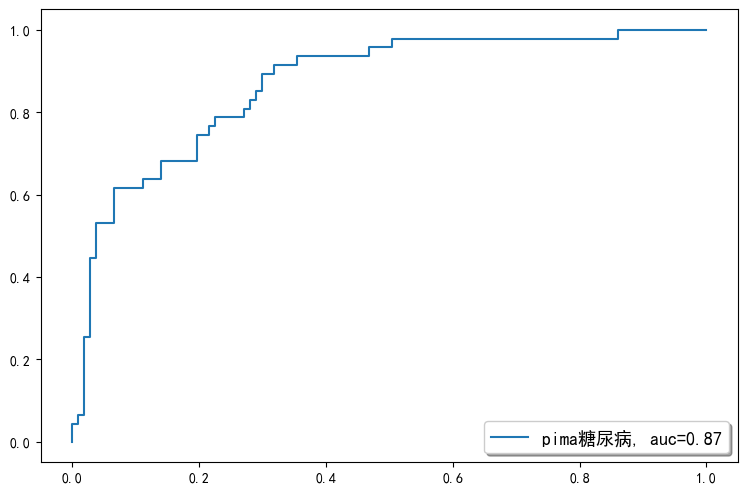

In [12]:
# 3. Logic回归
# 导入数据
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("datasets/diabetes.csv", header=None, names=col_names)

#（2）分割特征和目标变量
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # 特征
y = pima.label # 目标
# 分割数据
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# 模型选择和训练
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='newton-cg')

# fit the model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

# 使用混淆矩阵来评估模型
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

# 输出性能
print("准确率:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))
print("查准率:{:.2f}".format(metrics.precision_score(y_test, y_pred)))
print("查全率:{:.2f}".format(metrics.recall_score(y_test, y_pred)))

# ROC曲线
import matplotlib.pyplot as plt
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif']=['SimHei']
fig = plt.figure(figsize=(9, 6), dpi=100)
ax = fig.add_subplot(111)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="pima糖尿病, auc={:.2f}".format(auc))
plt.legend(shadow=True, fontsize=13, loc = 4)
plt.show()

In [15]:
# 4. 神经网络算法
# 导入数据
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 数据预处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# 导入神经网络模型
from sklearn.neural_network import MLPClassifier
# 构建模型：使用一层网络
model = MLPClassifier(solver = "lbfgs",hidden_layer_sizes=(10,10))
# 训练神经网络模型
model.fit(X_train, y_train)
# 在训练集合和测试集合做预测
y_predict_on_train = model.predict(X_train)
y_predict_on_test = model.predict(X_test)
# 模型评估：查看预测准确率
from sklearn.metrics import accuracy_score
print('训练集合的准确率为: {:.2f}%'.format(100 * accuracy_score(y_train, y_predict_on_train)))
print('测试集合的准确率为: {:.2f}%'.format(100 * accuracy_score(y_test, y_predict_on_test )))
model.coefs_[0]  # 输出偏执参数权重,共13个
model.coefs_[1]  # 输出特征参数权重,共13组,每组100个

训练集合的准确率为: 100.00%
测试集合的准确率为: 98.15%


array([[ 0.358,  0.144,  0.2  , -0.449,  0.636, -0.056, -0.2  , -0.034,
        -0.414, -1.105],
       [ 0.295, -0.291,  0.17 , -0.228,  0.742, -0.151, -0.174, -0.375,
        -0.378, -0.326],
       [ 0.303, -0.389,  0.404, -0.164,  0.734, -0.604, -0.485, -0.382,
        -0.41 , -0.57 ],
       [-0.225, -0.06 , -1.13 , -0.   , -0.17 ,  0.265,  0.567,  0.749,
        -0.349,  0.32 ],
       [ 0.316,  0.382, -0.01 ,  0.026,  0.322, -0.592,  0.236, -0.271,
        -0.153,  0.163],
       [ 0.7  ,  0.747,  0.335,  0.126, -0.756, -0.501,  0.511, -0.005,
         0.479, -0.311],
       [ 0.771,  0.577,  0.772, -0.729,  0.069,  0.457,  0.209, -0.766,
         0.145,  0.336],
       [-0.059, -0.067, -0.56 ,  0.582, -0.423,  0.647, -0.084, -0.244,
         0.049,  0.018],
       [ 0.087,  0.028,  0.247,  0.338, -0.679, -0.654,  0.029, -0.479,
         0.455,  0.265],
       [ 0.199,  0.337, -0.007,  0.81 ,  0.534, -0.999,  0.102, -0.498,
         0.305, -1.624],
       [ 0.666,  0.355,  0.395

D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


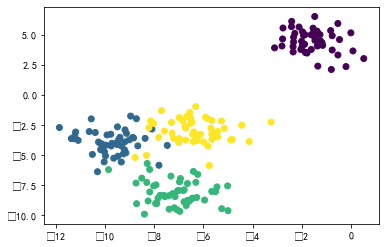

D:\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


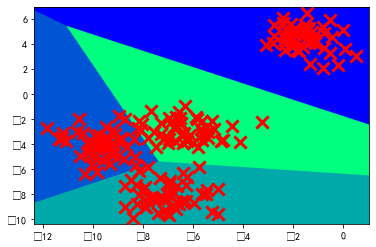

In [24]:
# 5. 基于sklearn的k均值聚类算法
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
blobs = make_blobs(n_samples=200, random_state=1, centers=4)
X_blobs = blobs[0]
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=blobs[1])
plt.show()
# 构建KMeans模型
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_blobs)
# 绘制可视化图形
x_min, x_max = X_blobs[:, 0].min() - 0.5, X_blobs[:, 0].max() + 0.5
y_min, y_max = X_blobs[:, 1].min() - 0.5, X_blobs[:, 1].max() + 0.5
# 生成网格点矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='hermite', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.winter, aspect='auto', origin='lower')
plt.plot(X_blobs[:, 0], X_blobs[:, 1], 'w.', markersize=5)

# 用红色的x表示簇中心
centroids = kmeans.cluster_centers_
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], marker="x", s=150, linewidths=3, color='r', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()